In [ ]:
# ! conda install -c conda-forge tensorflow -y

In [ ]:
# ! conda install -c conda-forge opencv -y

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import cv2

In [2]:
model = load_model('../DVC2.h5', compile=True)

2022-06-29 18:36:03.159463: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
def make_prediction(photo):
    img = image.load_img(photo, target_size=(64, 64))
    print(img)
    img = np.reshape(img,[1,64,64,3])
    img = tf.cast(img, tf.float32)
    img=img/255
    y_pred = model.predict(img)
    print('probability:', round(y_pred[0][0], 4))
    classes = (y_pred>0.5).astype("int32")
    if classes[0][0] == 1:
      print("DOG")
    else: 
      print("CAT")

In [5]:
make_prediction('Image/cat.jpg')

<PIL.Image.Image image mode=RGB size=64x64 at 0x7F9A029761F0>


2022-06-29 18:38:46.241689: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


probability: 0.0249
CAT


In [83]:
make_prediction('Image/dog.jpg')

probability: 0.9383
DOG


In [84]:
make_prediction('Image/duck.jpg')

probability: 0.9988
DOG


In [85]:
make_prediction('Image/banana.jpg')

probability: 0.0239
CAT


In [86]:
make_prediction('Image/cat-dog-cuddling.jpg')

probability: 0.9847
DOG


In [87]:
make_prediction('Image/happycatdog.jpg')

probability: 0.9684
DOG


In [88]:
make_prediction('Image/drawing-dogs-cats.jpg')

probability: 0.9998
DOG


In [90]:
make_prediction('Image/statue-of-liberty.jpg')

probability: 0.5352
DOG


## with base64 image


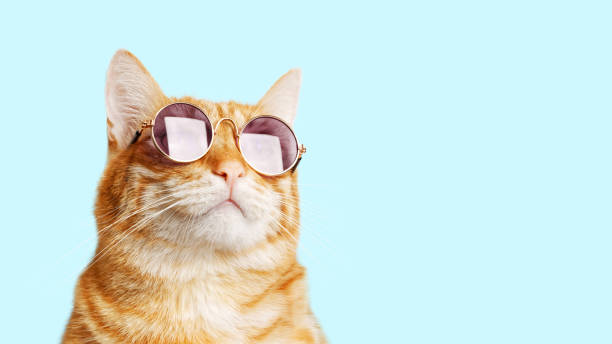

In [23]:
from IPython import display
img_str = '/9j/4AAQSkZJRgABAQEBLAEsAAD/4QB8RXhpZgAASUkqAAgAAAABAA4BAgBaAAAAGgAAAAAAAABDbG9zZXVwIHBvcnRyYWl0IG9mIGZ1bm55IGdpbmdlciBjYXQgd2VhcmluZyBzdW5nbGFzc2VzIGlzb2xhdGVkIG9uIGxpZ2h0IGN5YW4uIENvcHlzcGFjZS7/4QV5aHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/Pgo8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIj4KCTxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+CgkJPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIgeG1sbnM6cGhvdG9zaG9wPSJodHRwOi8vbnMuYWRvYmUuY29tL3Bob3Rvc2hvcC8xLjAvIiB4bWxuczpJcHRjNHhtcENvcmU9Imh0dHA6Ly9pcHRjLm9yZy9zdGQvSXB0YzR4bXBDb3JlLzEuMC94bWxucy8iICAgeG1sbnM6R2V0dHlJbWFnZXNHSUZUPSJodHRwOi8veG1wLmdldHR5aW1hZ2VzLmNvbS9naWZ0LzEuMC8iIHhtbG5zOmRjPSJodHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyIgeG1sbnM6cGx1cz0iaHR0cDovL25zLnVzZXBsdXMub3JnL2xkZi94bXAvMS4wLyIgIHhtbG5zOmlwdGNFeHQ9Imh0dHA6Ly9pcHRjLm9yZy9zdGQvSXB0YzR4bXBFeHQvMjAwOC0wMi0yOS8iIHhtbG5zOnhtcFJpZ2h0cz0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wL3JpZ2h0cy8iIHBob3Rvc2hvcDpDcmVkaXQ9IkdldHR5IEltYWdlcy9pU3RvY2twaG90byIgR2V0dHlJbWFnZXNHSUZUOkFzc2V0SUQ9IjExODg0NDU4NjQiIHhtcFJpZ2h0czpXZWJTdGF0ZW1lbnQ9Imh0dHBzOi8vd3d3LmlzdG9ja3Bob3RvLmNvbS9sZWdhbC9saWNlbnNlLWFncmVlbWVudD91dG1fbWVkaXVtPW9yZ2FuaWMmYW1wO3V0bV9zb3VyY2U9Z29vZ2xlJmFtcDt1dG1fY2FtcGFpZ249aXB0Y3VybCIgPgo8ZGM6Y3JlYXRvcj48cmRmOlNlcT48cmRmOmxpPk1hcmtfS0E8L3JkZjpsaT48L3JkZjpTZXE+PC9kYzpjcmVhdG9yPjxkYzpkZXNjcmlwdGlvbj48cmRmOkFsdD48cmRmOmxpIHhtbDpsYW5nPSJ4LWRlZmF1bHQiPkNsb3NldXAgcG9ydHJhaXQgb2YgZnVubnkgZ2luZ2VyIGNhdCB3ZWFyaW5nIHN1bmdsYXNzZXMgaXNvbGF0ZWQgb24gbGlnaHQgY3lhbi4gQ29weXNwYWNlLjwvcmRmOmxpPjwvcmRmOkFsdD48L2RjOmRlc2NyaXB0aW9uPgo8cGx1czpMaWNlbnNvcj48cmRmOlNlcT48cmRmOmxpIHJkZjpwYXJzZVR5cGU9J1Jlc291cmNlJz48cGx1czpMaWNlbnNvclVSTD5odHRwczovL3d3dy5pc3RvY2twaG90by5jb20vcGhvdG8vbGljZW5zZS1nbTExODg0NDU4NjQtP3V0bV9tZWRpdW09b3JnYW5pYyZhbXA7dXRtX3NvdXJjZT1nb29nbGUmYW1wO3V0bV9jYW1wYWlnbj1pcHRjdXJsPC9wbHVzOkxpY2Vuc29yVVJMPjwvcmRmOmxpPjwvcmRmOlNlcT48L3BsdXM6TGljZW5zb3I+CgkJPC9yZGY6RGVzY3JpcHRpb24+Cgk8L3JkZjpSREY+CjwveDp4bXBtZXRhPgo8P3hwYWNrZXQgZW5kPSJ3Ij8+Cv/tAKRQaG90b3Nob3AgMy4wADhCSU0EBAAAAAAAiBwCUAAHTWFya19LQRwCeABaQ2xvc2V1cCBwb3J0cmFpdCBvZiBmdW5ueSBnaW5nZXIgY2F0IHdlYXJpbmcgc3VuZ2xhc3NlcyBpc29sYXRlZCBvbiBsaWdodCBjeWFuLiBDb3B5c3BhY2UuHAJuABhHZXR0eSBJbWFnZXMvaVN0b2NrcGhvdG//2wBDAAoHBwgHBgoICAgLCgoLDhgQDg0NDh0VFhEYIx8lJCIfIiEmKzcvJik0KSEiMEExNDk7Pj4+JS5ESUM8SDc9Pjv/2wBDAQoLCw4NDhwQEBw7KCIoOzs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozv/wgARCAFYAmQDAREAAhEBAxEB/8QAGwABAAMBAQEBAAAAAAAAAAAAAAIDBAEFBgf/xAAZAQEBAQEBAQAAAAAAAAAAAAAAAQIDBAX/2gAMAwEAAhADEAAAAfq+nmAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABSAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUcu+fl30b4X9+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHJrF5/X0hjenr57+/nAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFfPtn59+EyrlvX6fJZ05AAAAAAAAR59u2d3yAAAAAAAAAAAAAAAAAAAAAAAAAFHH00Y6yuZHZeZun0+PusgAAAAABLTw9RbN4l18wAAAAAAAAAAAAAAAAAAAAAAAAAz8PXVNdTpIZ11jR6vKQAAAAAJc/m9ctJWT3jvTzgAAAAAAAAAAAAAAAAAAAAAAAAFz8PXRnVct+sF7mx560+jzWdeI4vUWAAAFp8/pTctTpLpx7viAAAAAAAAAAAAAAAAAAAAAAAAAKuPqomqpqxOkcWPPceeu9MVbjj01deV3XnPpzJyaJPfPtVcO8c9Jak7BLrwa5gAAAAAAAAAAAAAAAAAAAAAAAACrl6as7zZ1Cakksuct+f1uHqVnl0857XKa7nNy6X7zHNHdQXdudm8zs7Tr51wAAAAAAAAAAAAAAAAAAAAAAAAAKeXpqz0z5tOdWJznrLu+f1bbmwwTUKvzPe4zPx691nX0xDNzrl6SrTdc+nrn2x18ywAAAAAAAAAAAAAAAAAAAAAAAAAeb5PbdtnmsON8xcs3L0c56z9PrlEETx5tw3p4bwc+no9+POmfmuvS2uy6rnRMe7rhPr5gAAAAAAAAAAAAAAAAAAAAAAAAAMPn9Um8WN5ZryI2Z3m9GKdZ+6vKNciR58vj8+ns+PrGMXTWn18cF1lKDYbmdF5ev18YAAAAAAAAAAAAAAAAAAAAAAAAAHk+b15uHpnvHhbmTn20amrpjzdT9C1x6RrkVL4nHr6vBzGsG+nv8At8cCNciuXw529C8/S35LNYAAAAAAAAAAAAAAAAAAAAAAAAAHj+X2eX5fZPefHVdd6Y0axRt95vz2JFeHI8jxeqfNzOo7ex9DxqhXIlHy09Ht3lRy16vo8VmsAAAAAAAAAAAAAAAAAAAAAAAAAeb5fX5fl9nnTePeZVX0zHU1s/Y9OOveeEMvE8vqxcO2nDXc9Td7fNo9HOJwlHy07elcTxn1e/k7YAAAAAAAAAAAAAAAAAAAAAAAAB5Hh9/i+f111X05zMbXdZ5pYekzsys4bpzvBd7WfZ9HmnZj4dfS9vmlvPDh81Olsb+nl9PfIAAAAAAAAAAAAAAAAAAAAAAAACGd/N/M+r5ytTb05btYqlx8+sZbs2w13GvpznqedjtnnT1u/n13Gfl0lJVtr68uV5/Lp53Lf0vt+fLpzAAAAAAAAAAAAAAAAAAAAAAAAA8/y+v5rx+/lle879Ysxrz7brm2X1evGPPUJrXvGjrzt3KprBy77t8tGufY8/yejy3buXrd/NHN3e3wy6cwAAAAAAAAAAAAAAAAAAAAAAAByX5zwfS8Xn20JKtOuc8b19eTWMjW/WNVllSiepKyVZcdLdZ03EZqnlsYPP12d+VWNa/X5J9eQAIAAAAAAAAAAAAAAAAAAAAAAITXynzvp+bN9s9KZsJaep24ZMbq1NNzq1LEnU7OEFzZ6aNYvZmJZ2VS5uPSvGtfq8tvfzgAAAAAAAAAAAAAAAAAAAAAAADPjp8x876mNad49i42yYm/V7cKzJNX2XWWWW2TsgtLUZrNNetrhaTO1Tm4/P2vubO/C/v5+CwAAAAAAAAAAAAAAAAAAAAAAAY+XX5z5/08ule8euxNZWX7xKzOYc7nLt1jXvMLJ1pqxILkzdtzMmRzfN8vo19ecunLT6fLwCiAAAAAAAAAAAAAAAAAAAAAAFrzfmfn/UyZ3p1jXc+ZnfpdOWrpjPERZUsy/WdGpqssJk0oXkXHSvGsXn7auvOXTlf6PMAogAAAAAAAAAAAAAAAAAAAAABeR814PpRmnPWZrR053XNUtnTnfvMkis7LrLrJFtSS2uHIkVY1nxujh1Zu/wBvju7+flAgAAAAAAAAAAAAAAAAAAAAAACX57xfQwce3ob52WUzVGNc3nTvF+8KhEqtskXakksqxOkjkuHh2hy1DOtHTGr1+W3rw4KIAAAAAAAAAAAAAAAAAAAAAAVHD5fw/R7y6X6zdrKyNnM67YO13We2dWMWWTst1Jllkpa+W0qJ7zXjWr1+XvTkgKIAAAAAAAAAAAAAAAAAAAAAlUM+dfMeD6V+U5bt4v1mzWe6izpCXkTquWVnJc/Pc7NO82l1lmsyqMVc9141r93hlZy5KhRAAAAAAAAAAAAAAAAAAAAEqwcl8Lz+ryPN7JZbJL7NnXndvHKnqV5vCMtlnbAiGNkt3LtZnXbOy15tXLdHLps+h4LenNCwFIAAAAAAAAAAAAAAAAAAAUEBcPHt8r4vocluiVXRo1jf056OnOWnSOaizUIqRyXhCVEM67ZIr57r56oxu/ty3+/wz3hCwAAAAAAAAAAAAAAAAAAAApAWrG/l/B9LJncDQm24hL1bmdOs37zfvM7mVdshm9rpTz1KpWVc9cWGNI7WbnuM1Kz1fpfOs68gCAAAAAAAAAAAAAAAAAAAABKPP8/o+e8X0SZdNLOy57ZZZDOtesJbbNG8drkTsnqSqGbDGu2DlclhjWbl0xc+2vXPf6vNf6fNPrxAAAAAAAAAAAAAAAAAAAAABSDyPF7vL8vsmzRbVV9z1J2XWWxYWpp6YFms2bz2uxyWMvIhNdSvOs/LpGWrOtnXld152+jz2duAAAAAAAAAAAAAAAAAAAAAAA4vjeD35fP6ILu1ywc+9e83axeltk0nE9TR0xCW7pjtWanSObzNhLDNz8ekZb+3Ptkc6jmz3m/0+a3v5wAAAAAAAAAAAAAAAAAAAAABGX5/wfRnz3g59vV3xt1nHy68qUaN4u1izc6W7zzKzpO6zZqdOHJaues3DqL+3OWpGKee68at3mfblp9PkWAAAAAAAAAAAAAAAAAAAAAAY8dPm/n/AE9zNPPp2z0t8uRxbLIY1Kzstm839cWazZvNcvbLNQKhmwxrupKwU8t5+XTqXdMc3m7v57OnIAAAAAAAAAAAAAAAAAAAAAcPD8ntx+b1TTdcebz73756Wbt50ayKsat1K8as1mVWbzyO6k95lqCMvJeQqvnrJ5+wt3m/rzn0zC4v7+btgAAAAAAAAAAAAAAAAAAAAFU1838/6VHPpTXpXFuVed1zWvrx03Je2W2RzZWJbN5Swzb+3PhKzulebHnqnnurnvR25K7EOe2pf6eEuvG3rxAAAAAAAAAAAAAAAAAAAAA8/l28X5/0Ute5K59O4tTLy6wmrdZSwltyt3mVnc1Fu88llrNvbnLUluRxc3DrHNv7856zxY89Q56p570erhzeNXq8nbAAAAAAAAAAAAAAAAAP/8QALBAAAgIBAwQDAAEEAgMAAAAAAQIAEQMEEiEQEzFQIjJBIAUUIzBAYDNCgP/aAAgBAQABBQL/AO3Hap3GEx5Q/wD0o8D9lTG9/wDSW/geIrbh/wAG/bNKnjqPifP/AAN1yovtW8k1Lv8Agpr/AHk7uo9qfs0F3Kly4rX/ALWN/wAB7X9afKA9DPy4cnB1SwZLgywPN03CFwIHBl9C3ujGlifKBmgNzyc2fZP/ACSoaEw58gmNg6g7oH25csA3DmiWnPuiRujES0gqGZspTHhwtnI0GYT+0zTJpM4iB8YTJ23X65EY5NwMx8B/jO6qhtUYNY8x6zGxHPt9QCHHyXJLYR22qdQpmpydzLomrUS+uvUJi0uW9LnB2beMLHbqMoVO4+RzkaIalhojvp4jjIvtcxohgRlM3BBj1TZjvmqO3PpslaoQ9dct6T+mNWI8xfrpyZl02R42jziNptUJ2s6zHFmE9nL7XWP2zgyi2+2tzTGwx48ePuNnXeuH4uPFSumoXdpv6am3AaiCdkDWw9XQMiG5t34kbfj9prhumP4tlycMJtoBtpGfl02Nibdi6nlNyhd1jG1TLw0P8DePPi+uPIV0yNuX2eo5L0I1mFraFJ+YnAGmZDh6MQozavuwZOFNwQ3WFgyfw1XGqwt8EZP7jx7TUGMY3ITDcfTGEETYTNpEU5AV1OsEXLq3nauHDQZKmnSKom0ULx5UcOOuu41K5Bp8GhwlMXs2NDM9tutm8YWhei+NHh07A9rbFS4LBBAgbit01WFxBqVwpptQuox2ACRkhSp/dhSHRpvRZkOJ8jYjm1S+PZ6jJQyPumNRtfk4xcy7pb2HyRMbOVxUrAUMHPa4WhFbdMuBMg0+LsADeFQLGHGRd4On2xMO4pp1WOnyX6+z1L/JibXdES4hpsmQ3jAIZRKZWXmLUomdszbKAm6ZPGPxcInBmyVsZGBD3vT6+ybgar5OwqBzMYrFsLFR/kBoPvJOECY2RYM6mDcYblGES6mbIKRuOnB6ECLQbIJj+vssxpMvki4qktOaRG3AbQzATu87YuZFi5d0DNLMLCWWhxK4G7CVM3Tg9GNRXBZhQxfX2WovY0aLZbGpniLkWVvHYWFwsMDzHkE3gw5Yi3AkAjYwYlo3T88jt7XJ+OHx7JxaPdmhMWOo2Xat7mx4oW2wuWgW5tuHHztm3lVn4OrLBcAl1DA9seRj9mfGXH87VZQhDMca7Qc6pN1wSzV9BFg6jrXRhcJqVvO6J49nqfuAbRBW1aZZ2rgHKkCbhOJ5P4pobrMuCXL6u5V3/wAi7YBuiezPjUNeVOJ+hSYV5bgBKgEK3PE/OnmWa3QNLuAy5cOPdFWoZUHj2WZtqf8AsG2wNRV4s22xSbJ9YeZXNSuajDjmXFMHkCVKlQwGD2erzQNUXyvmxuE8T9hEMA6BZtlQpAkCyuvmXCYTENj2Ooy7FyPuinos3bYmThGuCHgAfEiBZUroepNTdBlncE3xnhafYhiIpsevyNtXM7OzKYtxRAKBqAgRHIKNN9zf0WXLuGCENcPMqpQmwQLDKhcRQSV8ev1DRvttBh4K8w0IKM7a1ts2ABwidPwwDpUM56VKlVGNRmuMxJxY4IPYZz8m8gAh8dS4OAeZ5iq8qj5n6IOSYJU/Oty4XE5MOO529sToPYZDbuvGMiMu5Sm2BefvBVDiAWdnKi5Uxz9Hk/wPELRmgW5XQwHoPXngObyEjaL34ySCsZZYlQbYPJM/IkA5/etQzaDAkqV0MXpdH12ofanztNxjiij7SHuGKomydufUAc3Fg6GKf41/BmqXcA6FYp9dqXtuYubkgMrBtyvEaopsy5ts1CIPHhp+iAy+vEsdGacsaMXrdEesc0uT5Obg4OLLYKXO2ROYGobviCYXl0vk+YeYDxAaPmXAZ5h46MwEAuAdSYDD4U+s1LfHZc2TaBFdREyBowBjCBaitU3zGbha4zTfFbhW4hgPSuhhWDHAsqVKhSVyPqDyPSf/xAAqEQACAgEEAgICAQQDAAAAAAAAAQIREAMSIDEhUDBBIlETBDJgcUBhgP/aAAgBAwEBPwH/ANuacP2bIs1NFx6/wqKt5TNXTryv8J01wX6NSG1/8JabJQr2un1xf5KiSp186VkYKOJ9e1h0VxnHcvmSIR2rM+varoQ+OpCvOa+KEa88NT2q64rFGyKFCJUR6SY9Iemz+Ni0mx6bRtZRCH2+M+/aw6z4+ysI749nQ1aIDdHg2x5S79rDrCPOFhujejcjes2RarydEiPkeKHHL9rof20MWEimIn1xiyvJDy7xJESistWanhe20fKKEP8AZpuxiG+K7PsQyf0zejejejcszVr239OrJx+8P9EVSGIrxxXZ9iJF3DimMZNU/a/0w/JtEsMaw+KibSSsj+uXaGbbJqnXtNES4PFEu8pN9ENKvLKKzqRp3xj0MnKo+Dv2mhHNm5YorGyJtivoTo3WIm6G2bmeJRJRceEOhmo7ftIq2QVLDGUJtG4vHjFF0ac19m3cTjtwriKX0z+K/wC0cWjayMJDj48Gp37TRhl4jQ0eDckOQj+Q3jxGbROW4bobsRF0brJOh6jZGXg1O/aaK8DwzsXhEnwd4svMOyWeujcdoaoj0anfs0aS8DLGyyT8YVFjNr5QXkfFD8oizWXn2cOyPXBEs0f6KZXFTaH+XFG3wJmt37PSq+T/AOy6Nx/vLXKx+eKl4oXZr+zj2R6LGbTobKKHi/kRt8CNb2mm/wAcJljNpQ/mQjpFGr7TR6wyxMtDGivljG0L8SxujVftNJfjysbL50VmihSocrzPy/ZxVsXRWGh4svN8EUUViy8oaJd+z0offF/HY2XySKJqn7LThYlXFoargi/go2G1m0USjolFMmqfsIq2QjS5tDRtNuHisquFs3G4RYosk0kansNFc7Lx9j+VKxIUScxk/YaPQhiKHnx8tFCi8KVG+yWJ+w0uiLJCdMTsfGx4l8FCQ3WUNYn7DT8REfRITEzbh3xlzRY5l5Q8SVr1+mrZWIkkUIcjcbjseHwa43wUTobxZNeu0Y/eNonR4oaGh5svP1l8qwkdHgeWrH6xKyEaWWhSN14ooaNpXCiisUVwSH4LzQ44mvWaS88KY1QmJl2NfRtGhKvIom0aHHCGuCEzeNl4s3FkuyS8D9J//8QAKhEAAgIABwABAwQDAQAAAAAAAAECEQMQEiAhMVAwEzJBIkJRYUBgcYD/2gAIAQIBAT8B/wDbkpDlJGHiqXD/ANKebiYeJfD/ANJnskvyjDnqX+FrQpX6su9v2uxO1fzt0OTkJEfVl3tZCVP55PWxZR9V9jFsZhzvO/inK+BLOPqvaxl0a5McsQ/WhY1CxRTRrRLFSI4iZeU5/hC2R9V97LGP+iOHXexwTNOkTsTqRiCVouRrkKxbF6su8mcZNmGvzsrKSsqiUW5cFGHwiSrkjyfTNPs416rQuh5N5LrfiE3XGSZWoSrZRH1sXhl2PKcaEhb59EuSJAiqW5cP1sYhLmsoj5YkR34g0iIl8C69XHEai8l8E52zURlRqE73ylRF2vUxs6yTy6FK820uzExL4W3BnarelcufVx5c5I5yss1Fo1f2ObHbKySsUUOCOYSITUltbIrj1JOkSdvJCLGkyh7EzTZLDFx0J3xlL9SHGuURxX+4U4s1IlioWJ/JD7fUxpZxydieWkUEM+m2fTFSEOKZFUxKyiSJWW/yLkWEiceSH2+pivkWd0dkY7FQ7NJWchZM4fZoPtZGVkm7MP7fTZN8iKzisnZQqNSOdstneTRwmTRg9enPofYsqGRzsr+TUhS20dbWalY1wYPXp4l1kti/oqzSf8zT+PslHmxvgwOvTfQ+yj/pqo7Ei6LFlXyM1cjMH1Jrk6GJCLyXzMZ9xqMLr1MXvOhnOSZe2/glKmSlqKErMJcepid7mhIaLL2WWXlZY5DhqIwrKiHXpy4Q80xZUVnRWbLNQpZUUVk2RYuvTxJbVuTLzY0JFbbJMumQdr0pzobvamRdizaFErc3RrPqH1Ea0SmWdkZOJB2vQk6RKVvdQnQpGs1liyu83ZY8qR9MURlDZFNmH16GM99Z/giWXwMSzZyLZJ0N2NkIkSHoY3fydi+CyxzRyzS2ONEMoehi9jEPbZ2NciV5QyW18FkpISsooYnlD0MTljyVjiM1FioQy8oC20M02LDFEooYiiLp+fN0i8mJl5KJoNLRdCLELJsi9ulFZykXYllpIvzsaX4ysa2IeTiNFCP3ZfkReyy0WSki7ORCYmaqF5jdE5W9lFUJllif8mos7Z2N2J8FilR2WKR2MslKhciRQxsjLKD8zEfA9rVjQuBfyWWOQ5GsUuCM+CyRGWSykNH02KNFFDiOBVEHwRfIvE//xAA4EAABAwIDBgQEBAUFAAAAAAAAAREhAhASMVEDICJBUGEyYHGREzBAUkJigaFwcoCCkrHB0eHw/9oACAEBAAY/Av63Itovk5l8mun8Gc/Jmfk/Tcdzx0f5DpVHyW67w1uSloMOzleaj1K6jsOmZ96fuYqVsyjj9dw2lDwr+hFmTxVCpSyNqRVScjwOcVKoY0yXxIQPSImKlf1GHHqOChSdmNVwqR1fGg9tR3wipUj5eFB2VIG1Td+IiS5H4VYSh/U4qXQZVfDD2dciCRlRx0eqjTQxUq6L1d0sqKYMpdRitO5R67tZtYdsNlQ2lPMRskIpT3I2ZxbOq7fgr/ZerUquSi02wU5jc1HcSvmnDUPou7Wn5Sqr76r+s7qxZufIpr1TqqXdbOhxZVeI1ReepSvbcVBKaPDTCDWp2ifh3qk72ShfujvI/VY3IO5hrmlSlKKnZLvUuFO58PZxRzXXdb7d2pBynYZ1UpKdWzu6DWZzgU8ZO0b0HrVal7i992CM+abnqh8Wv+ynVT4lfj2kr1bUzOY1RkQpxKQjEtuYqKXQyZdFMVI6kD0xVqYdsmFdeRFSE1IYmxVJqJVWronWIGRxlOFVJS3/ABZ5X1MxktKC09xlIQgZbTNsurs4qkIq91IPCQhyp9SdoRTbPce8HElufWWMo787Z+yH/ZDoPWpFMDIabrPv8h36wlOajWYz9jho/wBx9tU35SKWIJM7zSMvh3m6rFp9ks9XsPVXgpOCO6mbjqrINskbuOcV2pS2V8O5I6dVUY1MVStohwMPUr91OL2IVrTdxtPlR1ddO5wpOq8rMg8fzKRmpxKJJCW9fmNkOkVf6jdVzIHU7aWckkdYs56/Nfn1d1bsmhN5+ijqimq6Gf6kZipmo/8A5R/I+GlRktKiU03byVBH0c9XZCSCVHsn0ErAydSa2e5zJsiWn57D9UzS8ycMdzxe1pNE+gy6pmNlbIeo0QizWXyEuhkRbNLZGnkaIJk1MidyLP5CZDIY5EDYnXsShBF+9vXyDKKZDLFtDU72n2HHW3p8qesSpCOZmRCDqLUo43cwidZ//8QAKxABAAICAgEEAgICAwADAAAAAQARITFBUWEQUHGBkaGx0cHwMGDhQIDx/9oACAEBAAE/If8A7ua0cCAUng/6UrGLd58lRN2Sjyf9JeIV9y06hniBUMzz/wDCrBv3XnMoHAn1U3hg0QaWf860WxWuCFPeAjqZdf2h9MZar/m0XLniBD3gdyKv4lj+5kZmDKlc+t/8VijUD1091ZDeJYcE7SWGS4HUuMUTeot1SuZhn6ktUG2xlBq5ZKczzQ3foFJczUhD0Ya91xzO0VaVHxE/hHENZUwRLad3iClD6k+JTlOxbqOPJeSdQHJhmbSj/XzMv51DluCYgqlx5qdBgqCAMXnmEIRPdr3lVxaxAYCo90d8JRlP3K7H6YhxYV8ROqGYTv8Abj5P3E1KvDKRl+SH/kQO/mDnuzD3BGQ5hbWdBZTrQ6dcy4aO2jhr+6g3L9V/cME9DGG1ZHfuwFchHQipp5JvtB/c47aurhFwsK1VjtgOKFKeJ88Ia9F3E8QcMFFDiNV0HxxBEw35stcD48kVkit2OGJV0fuWOto4Jq7RfLAdYPc+ay8vw/qHSAwnu2bfHoEXcaGpuYsapDrqIr+E+3H5lrvdIsS0tlyr9FzOXeg+429sByLIjl0D4f6iuGrFvowf2SS1ifVxYpwxWxhO/X+u/wCfdhEWCMcC62XGcpm/QlS+ZjC9W6guH8wa/UFPOJw9DFZnmJRerA+D/wDZ2Src+BYfGfS0uXcLUXWMRdEllGKZdPE8cT7rxt1NplCzniKuxZTMTNGuoF0WVD/Ma45QNCedjF9fnBUFnj+TzM2EuOYuRPPxLts05PRfEZVksDV6mUArSPN4OaLWUq790INxDeTE1pEo6ijuZLUryjEfhdeTqElxPMfSt8OYsoPI7/qQBnHE72IcbuVaSoN4fUqVEgR/IEpsbAjkubIsHb+2ACgo90zrcS7/AAml+4rtt/cAZPiopsStrHiH+QSzIPZK4t9lzX58C5+SxXOrwz8S8tggjjQXuUs+A+iYjDcJd0TkS7N/1RNla/3S5j0XBOJ+UCavgzGwZV1RMDV5uf5VUoP4pZ4H5hu73xcxhgEVs+IZpiBzYwdgCWxQbwTNg4RiglBAB7TGarUFr+ttALcfMf8AMcLEgodD65m2UW5kfdNFcZv+Wbh3wTgKrG4iE+jGClr8yjIV4lGrfqZY18wc1Qqpg+CO4W/AjYD9YjsDxCFSkizQW2oNDY8TgCWQOv8A/JmbDshV/dKpCEFI0e5rRcdQ4mJ0TBlo6jJWqmeAeSiYMWcwAu3mO7Orjin5RLnB8Q13VzHhV9xQLgJzCFhAjFQlIlZTLVEcK31HZ/aYFEOdV3FY9zdsTsmxfwSjln+JYXRa5QDG3nF1BwMjj/NOBtjix1EsHxeZuXyYhlfqPMtOppbZoYG7ceY4MwJYFZdB3BanbK44jDMsj+FS6jT5I79zWFbl2zhi8arbNA5l4zeOcJAeDmWIBnvMoEK9EBzXxvE4HfnKYh4bl/5AtT4m0Il0IXZtOzFmME3g83HlqtPUvMTDiGwmSc647w/iaVq+4K6e5oKLrgt+JY2b+2DAwc/7zCcHXL7jnSHk2w6py5amELD1Kil+6XPQ9mXy7f8AMbhfQcQCc9QBvbCu4s2HK8yqMEJpIVJwagpXUTGJaQ1Jkpf+Jr9wUqx49zIDK+An/mRKVr8n0QKBbzmpfOEAxw4G3+pXoAYx/uYHefuVMKOZz1jiAZFwT04K4hj2geYcJiQRyehraZPQYMxMNR/ScBTK6IQGvc81LGQLb0lvB/uYiFt2u1jAWjvATaRWy18EMrL8j8zPyPBgmPCdBgl2T4IcOZl3v+EGQONrANm4AywM3dwmvolwjiBO0bcQFschxArteP1Obnv3N1MVeXHiOGFEzDQTFNbnaE5XWg0RSaUyviqcqWXGh/MDa9w+E4l/mg5paiDxeJgRxktLl+iBidkGF8nMGi/9QUe54Wlt1AgXToNsrkE06hvk83MQ3BQH15g5ZMuLrEPIPiIhxbPLGIU1MGUmVD7DLV6Z6A3JaFnNOArUwbX17pfSpnct/D5gLmu2/wAQ7ha4lZZZ+CZ0lPmPIBMn8yzi8SgK5luNEz+M0mUZRMCNfMFdxpb0IUhSNosTyXNPcnUsXI5eoA23t7jc0uPYM8BuYQDuVWpTTNsc0fcrFRGuoMTi5ZXj49DayNwlmZ4PqBd8ysGoPUaG6Z5b9Khg+5AqDURPUxdRbK0TBvId1uD6TmIZC4m7iLYb5lPPMCX0Q7mMaENZgNyjiUXEWZcMkDTdQ23KcNzJiUECWxPCRMnuF+xNmUZRjUsLG/ErDKcW/wATF2vVTKF9RLtebZS7rco65i8m3UoGOJynXFipatwW34mnMFMzsi/UeLJOmErMSt2dJ5ZB6rMfcFZtPojmwsGz8zGYolEWg47j7D04nIHwS/LR+5YhrMWba5ZffLiZIYwgXmVYiGGMh5lCGp3JSUUHPEYWkpQgmRD4i9wyIbyp+ZQKPEDI38QpgfmMst8nU5RTmLcbgfaeYfeYKjZ3KqVhlOsyG/SiC44VCL4ZiamD1EbslTdwEtWNvKrEDGvca0S5NMLZS2CF8vkjcP0SngHEARj4iVW+NsvgdfiFQz3FUODcWx5Zo1Dn7m4uRwfPrV4T0A5g8FxlaVKVUqdvRBW7mPt7tZesEL0P1EKfpKl+2MnBCObg24ycX58ziVmGEwV+YNJ/UMj5hr0BiTMKZVMfRYKWHpIdMJ1BAYUfbzXuDl3SlSPOPo+Fx6AB8xuD6IRu59ieeL4ljp5ZYAYDmbq5ihyts0z1KXiWYjzLz4nmXLjmVuVAi1DGZSamBOXMwV7a4I1BqAM/yZXiJasoPDghGQfjL0Adn5Ro2uZHg5jQx8TAoytsoxzEgWPLibl2zqfynB6lpqL2lW5ZwwgyxeBUzxUwm4+BFZ7ZfMVjVxyFkM42I+MXS0e5u2CVbk9QRLtcSp5MYjrxFFjM8wmCeyOrxpML8y1MvnuJ4p2JY+JbGh3BCnSchLOMEEIEqJM8Q6Tg9sopcs7mBtv5iu/zMWHC7xKuhfRA4PVzNBMcEDL3WIpHk/omR0yiOj9+gAXmcqVu+YODqpcn1zbAQEnnLMWxLlE+MpM4ncWQvRFZ7J//2gAMAwEAAgADAAAAECSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSQSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSfGSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSST3KSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSxBYSSSSSSSSViSSSSSSSSSSSSSSSSSSSSSSSSSWu0MSSSSSSSxQSSSSSSSSSSSSSSSSSSSSSSSSSSj/xwSSSSSS9eCSSSSSSSSSSSSSSSSSSSSSSSSSEk4Em47TSTMIgSSSSSSSSSSSSSSSSSSSSSSSSSS7FGBgbJxOn8+SSSSSSSSSSSSSSSSSSSSSSSSSSaeo9HRqyJBM2YSSSSSSSSSSSSSSSSSSSSSSSSSTJ3f32z6PqHU/ySSSSSSSSSSSSSSSSSSSSSSSSSdBaW5LSny7VoqSSSSSSSSSSSSSSSSSSSSSSSSST5w74gC/OxlcoSSSSSSSSSSSSSSSSSSSSSSSSSSfWIg4hBO3MOuuSSSSSSSSSSSSSSSSSSSSSSSSSSsnRfLth3fJFMqSSSSSSSSSSSSSSSSSSSSSSSSSVHyY1Byfr5IndiSSSSSSSSSSSSSSSSSSSSSSSSS/qt0iGpxnMl1iSSSSSSSSSSSSSSSSSSSSSSSSSB9H32IbqDJsoWSSSSSSSSSSSSSSSSSSSSSSSSSR9gswOcxNn3F6ySSSSSSSSSSSSSSSSSSSSSSSSdOhenCwZo75A69JJSSSSSSSSSSSSSSSSSSSSSSSP33EpR1vmP8teSSSSSSSSSSSSSSSSSSSSSSSSSQJk5nJISgy+hSs9SSSSSSSSSSSSSSSSSSSSSSST2W1cXt82GPbn4H9KSSSSSSSSSSSSSSSSSSSSSbOIllK3c4BOCiqd9pSSSSSSSSSSSSSSSSSSSSSTY5Hslx0T8CI+5d3JaSSSSSSSSSSSSSSSSSSSSSSXscGawxEOP2p7Y/CSSSSSSSSSSSSSSSSSSSSSTP0+l18DQfzidmWp9CSSSSSSSSSSSSSSSSSSSSTpAOrmby1sk6AQUmLNCSSSSSSSSSSSSSSSSSSSTqcx3g8FkjfnmqjVZzZSSSSSSSSSSSSSSSSSSSZCZ8vJV5I17kA1cM5ZiaSSSSSSSSSSSSSSSSSSbCYgQlh+p0+BY3A1yBJCSSSSSSSSSSSSSSSSSSbTdnfXTc0mK2CK6BoijSSSSSSSSSSSSSSSSSSSSTZSL6S2aAZ+Xp4zNS0SSSSSSSSSSSSSSSSSSSSSSTEY1ohbTbAAgTIV0SSSSSSSSSSSSSSSSSSSSSSSUpkECeQPGUZ0EuaAiSSSSSSSSSSSSSSSSSSSSSSRMxSNdonrtMoc53WSSSSSSSSSSSSSSSSSSSSSTcMZWEjF5GfbYbYBASSSSSSSSSSSSSSSSSSSSSSYH1yjRifOtq5cU99PiSSSSSSSSSSSSSSSSSSSSSTV9ctK6YUHeO9FMdySSSSSSSSSSSSSSSSST//EACkRAQEBAAICAgIBAwQDAAAAAAEAESExEEFQYSBRcTBgkUCAgaGx0fD/2gAIAQMBAT8Q/wByGf2YDzOg3I8j+yuIgwy2XpvoX9k82z5QmpOLr/RKNbBvy0t34GHIl2f10WEJr3LvyyMNykzyR6e5M4/qouEP3S+HnyzVjwMEEyxY2SyT+gG2fXcvlch8r1xcSeR3YTGGYnEN2EMushOoXUfrnJydMtWZDPgn8qW0gb6JHqzLAcxv0uCGw9zp1L0kZypBeIHlm9SO7JDOJny9+VF5+A+rP2uYfuTWE831RYvu0emRnTrCzP2y5uyxjHOIncvqdJcNlr8qhbhjh44NpZGsMIb+JtyBcp/hLz3CPEEeIxAkkyCdD5Y6EocYyyaue5y4tjPx6oFBv7sHVzdsEAKvj+2E9zNv/v5bmFxwOLTwv5acN0ga/FcPBMv1PN/FBhcG1flVi3FkILEs4hYclw8kMfwO5w57btt6UOF+5E4fxHC7wGv/AN1C4+U6ze/Cu2wbm7aQRKeUMG33e5OzHuMZvtfiuMebt3K/9Sq1+UyN8LZtL+JmrP3adnjB4FlSGxYSmNNntTnPX4nNwuMOj5TjIcfA4jHseECnMa6lz3KjideCUvMvpYsU78vEr+oFcIKja+wnLXtwyQvRAOeCEBBj+U2dbAMJcIqcSYQXMFwknEqzd5sHFjdCSusmSfDYzJnxL2ZY82zSPVYtLjLoXb8mGsJwk2Swkghdjfdwl10S9mMLJM1bLkCWr4E9xvJXbYeqdcwGHHa22/IHWxojVowC/QnlkDmW9QX3PYzhGWw+G5Rx86lsk6k6WXGWXyY7zsnCTZQ7l3mXOy027sb7Nvoy3c57kPAMAd3Stg6dzZc+Bso1aMvDPkQjsYE89SY/cx9GsVOXg22LB9F/HiTIPbLbLCOpY3yFmPELtCLU+SyWBkIW02OjmGutwML9casDK3Im28S/iPhbNu3M4nBtPfj+Lfj9hdhxOvfUHuRms14/6/8Ad25nHXlnhn8H8eEOdtcnr/xZ7lznh+RzO7TWWNveO/EhLepXqWeMs5k2zLPD+AQQdbY6ugdXN46s+ODbc6jiyi7xPWE4W3ceCTBk5ssuLDwZlkQMniBbfTdTxt9l38Zn7liyL/BcpNt4ZxLhkeDlhy6W28W3aw2ZuEzUuwwuC4Tvz38X1574LJ0We3wlzmtq7s9+CDZLJbYjHgVb5IPByJ8G6u/jwncY8E2D35Yxyy8yyZt3MeNg259SvFq4uY/STGR/MOB8f/NxzHTZMsKSr1CmR5xcNtHcFpsuEHM5JFh6ji3Ygc67k7COi7D4Byfj9t3Y6l8LGzpb3i6XK8XLi+tgycxhLsMMZcSW2tq+II4RBrN0XOPyAh4uDLfJz7s+pnriOP5uMnhnghm29+Obu5QrROBkPS0O/B+Qkcvoh4ABfSRJP3Js8GwMkHFvj6nqPA2xzC9T+4eEvO2+HBKZHj48NYYWtlHlAObH1bSrM+72EnHMHuTnPC2XievOw+Ay0ndsLJnKeITH45TgBjOEhLWQSySKF7g1zLjCzfB2xgsH8Di3bLBszYzgllXLvx3vN/zOjZFka5Sfri0g5zA+7MjJGuYdkNuHwzjwSzwEDasn9WAth0kks0MfjGWWWRkm2dhA4SGfqWsJYOiNcRpwuiOOP3BjOHPBKSZw2GaaRzA+p2WJ0yxAiyTG9vxmlHCZX1KdskQmeWegkcEYsoRO65XPbPFkB8aZLL4YcyLXwGMQICQm8GPwn//EACoRAQEBAQACAgIBAgUFAAAAAAEAESEQMUFQIFFhMHFggZGx0UCAoeHw/9oACAECAQE/EP8AvcY4XUL4Qf8ABTw29uyRPS/mf+CVzI8Mgx7D3/0TthbPtrLM8JBwR5P64DWU5wgC9vtVNyHfwJl8Xv8AqqBrL/BDPA79qPBrwkss7EMfdtti3+jpx6/APPtfabts+ClISx6e5RmSps46W/uVP74PfDhzbS60I8+n20zl34bXzK2sDqAHrw3UJWoDPg+pnGXYuGDPr2Wu+/A8jn2qOfCC39Jb9F7Zm2NjKiE2xh4AUmMuDbcRfjC/tDPm1PZGMGsevtQBS3Test0y5vIw/FtBpZQ/5xM4/wCUlZAMPB4cdJ6/bLpAGkoN5EOXO9I8ZZ4bBq0nZZt8ixLGx/D2PtnmNjC9sHWf9qKXM8/ETMuBepHvYhR/Z/5Y8PPw9k9+1epLHYLO2GVuOw75Jlwu0ep5y0duPUAE8Lzz8xbJAX7Rdl8ADYiuWvREPIuq/jk8m6nJ07F/D/Fifm4f7wAYfaaYIh2T4WJfyiglPdz6Ur03utoO+DXY52SY3tFqj3+vwbCy0/adSTRswn2WWfTegljy0e5Vuxh1gDhA7ZBXOQfR29x7Jw62SSXoxhcH+n/F6Rk/mP66yOvtPQ/aZ8I66z1kHuOsw5JIsNewCJ8XwC1gLEMJaRFrLYOwT0WhywsiJeRu3tBer7NcJHqIG2/MdsT2sJT0Xds32w9ggi2+2MwBbcG3r4D8T6TazJHpCORI9Fn2Swt6tnNlit2925BPIJ7kPiPURr3O2WeFzIeeUIED7g+DA92W9/ZrJt6llinIBBTL2ty0nHov2cD6LT1Cvu75Q+zzXLj4WSmLHiH2dh5dWGe4dP4t3hZ+3JA8XDrBLQib1sso7b+o8psc5NkvLcdnMPBPX2Z1EUQXHvwzwTq1v3TSkhZvhngPxTwEoT5yNxCc/wDv+YgOfZoZPuA9IPxJYO285DvkPgj+gw2XMsFpx/3/APdr1da+0wXY6Qc76jAoMhPcFi23kOXTb4LbfCzwg5Ke/N7b7/3sPszPbmdYc6+41bL0ck8OHbZHHYSW1YWeJB3wTJANtEh+pw6Nx9mWkO/zL/rDkYS3sGuz14cPcm3t4Z2zbWWy0N+i1WG+7KRiSLLrnvxevsvjGX4PC3zY26W64eGXDwYgs+bq1tYNhb4ez5MEE+yIyL8DSXyjwg5bN0uL1HqcsPiw2VduPcHcYXu36LR5P73tPcl2fsOpN0hljwmwDsvU29ussPqfkWA5bZ9JeQsS6Qt7dEie5bsh6WPqBnb+TD6JCOY+wzM8llpGWc1suZ2cNX8pRGOJLZSfMkm0Scsfdg2A+E/t4NXWGfEvsFFxhty3YuWxtvey6cnd5HCXTknINk5keu2npuXqyMj3ZI03Zp+lDPsr2i1DS6MJnYRt/UYjrJOJO2zNy7bdbhkkkg3jaifm+FOtjjIx49MgV1+wvq7Ycg7bctPbDLiNvYL3cPJfEYFl5DIdj35yYWRMHdsDwREjjC8QO/XCrOm63Fh6tMkMx9SUDIO6xjCPywN5aFhan4Jt2gQShGFi9oIHu559cPwv8rRaGxuwkIMzeSD1bto8sTD3OHJOf3tSde27i5iD4XJFlYvnMp2bnj2C0jSWn1mDbZfA27NX1dIGSA/mZ7HHScmsw+j8FgYXV+8qxh9i2Wk5MEh9wfKC+WJyMeCk+widg9fWZVaw9jG0IdihHCGNZnVd+oiLl6rAR42zW2MJJP7hVgQeGvNjTtmioLSX9y1yR7s4tPpP/8QAKxABAAICAQMDBQEBAAMBAQAAAQARITFBUWFxgZGhULHB0fDhEDBg8UCA/9oACAEBAAE/EP8A+3Fyi+e0aTlmm5YgOFf+ldtNTJByxpbfuqAt09TcoExN9f8A0nX6biRxbtDWF4QmDI8bmo6OSGWnI/8AxZ0G6h6/VUtDrKozA0jrjcKytnUKgAo462QhcQ2doY6H/wA4IlBGk/NYQxuDD2+qpuGpbxtjbg9lIahVyWixWzVYiCs++zzGtaupv/yqImg3ErHHR1hBRMIxGvqoVdiBu9dHpKhkJhESmkb/ANIiyXyDZ5gakWd9xyBhWHDiWdZYQKbg3/4VTV33hhlqAa4iBpgr6rAIeYCVC6OtRMo98VLoFnF4ma1lzLroybJdAgeUzoxSsH+RVpYz1feKXVAD31Fa+xK4oZLohXlWLzNKBvpCi7NQDdJxMF3iU6y/37KHdg53BTiATUFD6qbA3caFWd5ISHIdV6PXn1gaAcLfr3lKqnZUQBvFXrLohpct2c+XHaDwe6p4XqBXELAYeFmQV2r6+mT+xKh6iygHPj4PeUrI2jjh/tzEJim19pU7Mlfb3g9C2mEz3yf3eWC8feOqbr3ZULJt+IQKuZ61KOomOI/VbRdde2o6UY8S9R8J6NM32RpgOmlQXRg56Ha5iXDyA7ry49GN1AVaW4uyj8Q5SC7r9yPZUzU38zkxFuHvBz5Cs9AdHyY6VjUUGzArjzuAtUDqUBu3XMGRNl71wDbO1mpbFyFHeB/7vCYOMuPEWsZsoPuUz9HNUyoD6FH2Qv0uFCJyQYAx+qp6DCHT+uLcRMkqIoo3LvRKwQckAhRpN0F1RsiRKwpizyDhIfRJnSrVv3hi0onmsxDGDUVBpSEeEgUtUC1iXovy1i/yPAR0FBwd7PY1UqTVylBeRJvDUcxad0PjvLRXgOToP7rvUMOFx/D+9yhffVwR+7K6znOIGGOj8vUuvJO70gGAOgn1YXKyreIDUTtHYF4rEI0JUfxLjZiLhq3d3Dp0C7eY9qjfbos+GX0rFHQcfmNw3MmpRC5mEwcP0bmmyLlux+YotW73wxgDMM9IpavRXKhn5QELrChXlf7iAI07CM5U6n7o3/VH9EQxebrC3GODMQ7KDhux2/jP1avhDOkypvcRXBbY9GIDKylgiOa5CLugF/UsrhdzyPWntBfKB6Uyxq2EzW/+BilZFtH2jvKbH0W33gWTDowNhV0V0gOPBrtS09ItNXEGXSWwSKV2WdGKUHsS3m8HDlHhBmJqvTopk9H6qYvyYm0qijrDoC2exiFFPOYmV5zZxFsI+5LvTTGWtHuQ44E8IEgH5u/EKNRhu0L7OjG5WpC/nnyXPtDADy5jOGu2MMvAHN8+2/eJvLzHZzMzE0KZi7QFhzKzWdDi40nMf1h8Acq8arMc0WoAGFNnj6oQaBGYHQu6iglctsLgQ6GHUrzzhimp6MdNka6e8Ykld+XUNvcekqBNSwIdT8mIOtnn/ifepqP9gNFGrQeP9GCAC23MGghXeLmYHA6qADYOGoL11j4e0cIkblmOIQVEOw2Z7hEdFlVbmKDYdmLWNOIZMGACg+qVoFeYnqdKNvXYdh8scVDkRB8ZlfLO0v1L8tNwfQj5Vtx0wdIJ3Dhd+0rFsaJV65hBccIJeKIMoG5cvBFtbOmiBBEGw5gGfggEnvHJBAVoDHTw9o6DVXb/AF3j1ErxGRdeFX3IDE2eEmuhz6TYIg3nIfP1S2G6xGa/OIoprIIYKlchh7xFvCup8MEkh0t/cqVF+ll8RRhvVT6ksF5xVx/JAzQ0gD7piaWN4C/bH5h56LAowyjdrcEHMhdnRlGQK2oR0wCvR5g4qGhyMPpkq8EDZpoY2RUqGg+z1J0EWV90hdezwjFiry+1ypqFea76nmvEdqMsOehWq8VHa7fVN8FbBqXmb7lywDMq2QooCg1ojyNY4X8/eVmOHKIVtoYoRtCk20v8QvgLVIT2gduQ2KqW441bFh7ohVB2Lj2KYUQPSOWIh6HIkb2Y6TEAyFKKvEbl3kYYMAg4CqiIgezK6K7mV6xmEZpJQXoLUkIpuy3BKXyjuGhqsfUyVcEeZC4oIg1Uwpv0iDqFVXUxywkQOFz5lYs/xo5ir/sH9kVlY5X2GV4TfR3OVplSvo5jGVayLF9/1Ch6HSoGZPoaSxAdrg/EplT5xGlNucv4glXeZUYtVAS7qCHEyXoRUNXeUvRydwrki9Wr5l6cx4so1CLt1yy2XL+oChxiIboXx0mCtOS2IF+FV3bfMZikpjJ4IVAHl6DGAi7PXWa+wglkGM3X7RgWxyWr9OZlB7u/hf3qC28Gc/rX+spAgaMD2gmYOFzNhUZoxLMiDvj4i8CpmlU0GEBxMq+8AKTBEuGWDujDFozVwVEIiqxYP3mWfRZ+paLq3sH1It6j3G/qbgF0wS3PNywhonoT0uGQVFANLGphCWEo7X+ogGNXUSiGKh2fj2IpkDx/o8e0Wpk2lr1/GIgXpoSq9iLyJyKPt1Gkngqy+WWrdat29oq5WLzUFeiXZWIQVy6dZSPz5XbG9DM5mrqOkGxW1DcpJQH3xASls4gBKHrX5lNLZ4y9sfHrMhQ4afqBkLc1POfqSF8CNKbcZ/eaN+4L5JqJNOljfgXl21DAVecd1/eIRQNow9B2+gkpYBmyTqt38h2gM1IAQe9BUQAA4ypXHQs8+tx6fMBUIuVcvp/sxqPQhEJGzQrfiXNIVj+ZddYKwKcsxld1/iZoYdVlukYBR2M6tR9nUEsXCBVWcMbjLXxEoHhl1QXaXn/Hud5uKw5MXAFycrDxOek/sfUKlyCJoiSbvQNAeWFE5Yr82CgaEH8Or8xwATD+Rt/sy266fb5fxKJBfW9ZuL0gUBjwdXfXZmSKHc+7GZ5BHL0IXrJoOh+vvKsiehfvFmlwpyy/y/VgVlpqjQ1GF1XeIbFKDozYrIRqDadob6QYKJ8wCKyZ1fWKwyGRydoXG924f15+8QTLGQ3+mXkHOyeZ4l/T7gpPSIKTJqHbu9ibmnwdxoPv5gFneeW+O0Q+HLgO8HPXM7dOt5z4gUHbN9NXHiXtsHpBUrZoYrB/eY2IeE35ZWGD1dJk2s65/SEBHLQOX4qYIvyupaIU5V5f1Ex5tZ1NvBL5V4hohYQB1B0IBXJpOGUDqkNI9o1AFo9yuGPAZExuB0FbHPmfD/zz9QoK4hVmgPs7ytATRnPfli1lw4M82/g9YWCtAaXwr0/iAF61YHYOkQWNhNyvPSN+7EKAmqDXbt/8g52G3aOb5O3v/kdiaSngikpeyDAX2OYn4B0eJagosr1lkTCvxHOe8qo3cAYWUszmJLtp6yqbHk1CokS7OPWH1ncML38xihXno/csd+P+a7kr6dVy61EIukSnWXEAZ7C/x7yyRoglgder2+8via8sv7/ICzTOTB3iWAFw5XlgdJtrv5lCvAGP7vEiwm1Q8EpV8wMQ2wxx1jCl1VAdI8gVwTF85YZPHwEAsuINGdTWukhhXrLg5II5zAxbNVBfUTIBsckcwGduJmV3/wB7k39MrrL/AOOkabZhlz/Gx3fp79FCgwmPb+fESLNRRoIwi2qb8r/9hwQXArV+ognRCnh8Q8azd/pABocGiGUbRRddiBMUPn/JSrjbuxGZpxjmaFa+JRIGovUUagrFRxDkaSOyZEyc3NC9uIlW+01bMoJC/CHYc4zUEw099x41N/8Ad/S9f9VJ6RgavLg9f70iVXkcP+e0RnBodHeCgQ4a4tyQwN11xgCCqC9U/b1izyD1Zcs+Mj9xrTzutREBhGCnS8/39mZhdR7d5kWYBQlt1y7mK4sSsJK5TPWuYaNcs9DDAYGzqSwuhhjPG7gDenTpGiu4i8mA+e8S20b4qDxGYRzNTf1A5til59IlVV7q8r1esFphdpS1gioVcmivLDFQlCHMUNzQZ97eIytVCsb6/iAcA35OiZBcnHmYRy0S8GnATQ5vmJwrWWURXFsIPS4IsYGCXYcxz6q9wmZVp/2WV1dQx/kAoeTZEdHoM5aD0ZYRYepLdWOHiVvxqiyE7h4zDaKfp/mdQawSx6U4LmFcY4Mw20z55hXA+oD3dS0Jjsyf7A2tB1NH91zEw2/QH4gO4o9ILqu8DZiBeHN/ogFCjk43+oGFYo+MSks2EJ2waIgsvGIENsQGpgdMh6yxgCBQWj1TDDoBXUZZ0MdmWylHfaOtyODLOpydf1AZgolbewi5wuCVwXQMQ0C3j6fcD7BDdmu6C7Gtn+x0v1agFqxwjaeIQenQG16QloTqkHocRYtvnML3/UQKQ9C4/wAETCMkHQ0QLB7E/vywVdlU6NY+CN13gL/vmPDomYnTpWJlr0nTbzGATU1xZ16QFRk6fqFta98RSbPDcUbrPTmZC3PaG2y4obg1WNEozB5eZuw94YfpOL6e6mwPExVfdGE2A4YhqT4YEzXnUCq+WAkXkrP2e0FTPNGPQdsTXxMA27RimTWUgePMEAtltBLHVB304/EpyNBXTiXMMG/1NE0MrCtwCeJZbzqNAOQmShk13jlWBeGUjA103K5s+vEPoHNsLj2KzG6RxsCAczy/iF7X4uKC/hGh38w6V+n3LLgbOJdKHoP+THhaS8soVL1UX8x5LvkiYnddy+hqWgxwVKeOCBAgGGi/Xb4mGLfIx/8AUSEisiMZgrByzTp0elTCJlLy5eHvPEBUN1cQuNRLBOIAsCWjk4WB3v0uWfiGJZoOlwCjEAZfnEIFAvz+Yq0XfdlgemKwX7fTzQLAiEtjSL8yl9iilPUz0QQsh0Mfaepokb2A3d4fSFZXrWV/EKzRc8gdiEhUNX1ehGAkC761MaoW27zUUspM0+CYLm1y0XjKxBPWZF6zACusqU7JmHEB6+TiFukPPD+o4iYeeYFlrKygfaDrr2gjR6Rw18CCLRLW8SgMGwT6cD3kUZlvYlvUYmhwTH3l4CeV+MKWZRbT4gZRo0GL5l0BbxuHaKOhBV/u8blNHBi/NRwwhduf8lhTDdPbr5llnK3PT+omQnsLk/EwuKq/rUoFtr+YmjlcQR1tm1w7RDSNMvvHDGmMwSnh4YnnQwNYplGsQNqilQesr2c9pefuWYtgKfchFt46/TVYy3Gllid21to+9Ez+vSDfzMZImqwSzn4APd4mCodp7Yh2s8rb4AZRRS+VV66jqbDzE0YByuYygXwczGbkHLLIHLHnH6uKRRZO/wDEVy0AvvNFuqJkHAlbPIiVlkhbiOMhvZBsJT1IjCIqBZ4YbMHmLKPWKRUNBHQsDogRgEfe5UywaYg5aHeyASfTDYaxFMsvliBFnEwXo8rcZCBi9vm4UdbKlOncQPbEso2GhafPaNmzqja9jQfbzDTCVBf9iXB8us95TYUMv94+IVKRGv7xCyrVlvBe/LBv9pEr1ygVGnErmmeUEG394J1HSOTv5EpZpIaSA47QRgr1/cp1k74jley7i3B7hKCb8Tu+0wbr3gHbHM8+ssSPaFX0wT7HiYy1fRgFAOdy0f6ye0Vp1AD5uChXLilI35VuAxQ01r3i3GRRkXzBToYXb4+P4ikwSXfkr4iAi6FcGLo9glqNXVubcvxBwHLsOTNf3eakAKOgF/mvaFUVoX5yyuPk54cwTJaA9q1EeKU08JGu6VyQuxLeYjNV4nIS7gZ6dZdQRw3VQFls8SjQQxttEDFx4LiXFDzMWjNHfmMck+ih/9k='
base64_string=f'<img src="data:image/png;base64,{img_str}" />'
display.HTML(base64_string)

In [42]:
base64_string.split('base64,')[1]

'/9j/4AAQSkZJRgABAQEBLAEsAAD/4QB8RXhpZgAASUkqAAgAAAABAA4BAgBaAAAAGgAAAAAAAABDbG9zZXVwIHBvcnRyYWl0IG9mIGZ1bm55IGdpbmdlciBjYXQgd2VhcmluZyBzdW5nbGFzc2VzIGlzb2xhdGVkIG9uIGxpZ2h0IGN5YW4uIENvcHlzcGFjZS7/4QV5aHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/Pgo8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIj4KCTxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+CgkJPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIgeG1sbnM6cGhvdG9zaG9wPSJodHRwOi8vbnMuYWRvYmUuY29tL3Bob3Rvc2hvcC8xLjAvIiB4bWxuczpJcHRjNHhtcENvcmU9Imh0dHA6Ly9pcHRjLm9yZy9zdGQvSXB0YzR4bXBDb3JlLzEuMC94bWxucy8iICAgeG1sbnM6R2V0dHlJbWFnZXNHSUZUPSJodHRwOi8veG1wLmdldHR5aW1hZ2VzLmNvbS9naWZ0LzEuMC8iIHhtbG5zOmRjPSJodHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyIgeG1sbnM6cGx1cz0iaHR0cDovL25zLnVzZXBsdXMub3JnL2xkZi94bXAvMS4wLyIgIHhtbG5zOmlwdGNFeHQ9Imh0dHA6Ly9pcHRjLm9yZy9zdGQvSXB0YzR4bXBFeHQvMjAwOC0wMi0yOS8iIHhtbG5zOnhtcFJpZ2h0cz0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wL3J

In [30]:
# write to jpg
import base64
imgdata = base64.b64decode(img_str)
filename = 'Image/some_image.jpg'  # I assume you have a way of picking unique filenames
with open(filename, 'wb') as f:
    f.write(imgdata)

In [34]:
make_prediction('Image/some_image.jpg')

<PIL.Image.Image image mode=RGB size=64x64 at 0x7F7857D5CBE0>


2022-06-29 13:08:53.523556: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


CAT
